In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iriscsv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4247%2F6570%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240613%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240613T060256Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c3b5962aafd1795b926332cfe3846a0fc7917998fa7a4d2d7ef595d866c3a747542255660fade99ca702794080abcdf0b61806f39378a84615c4b69dd3f1c367d9803990e035a2ef3a234655ae61d533e2d7ab044a13f47ab1a065db3ecb2090ac450046af995509abbfce3b7bc26058034a3c7908f5712d1f0c0b861dd54c041f65f87c2b119c06c35edc9496af34262738d812238c5b8a87e936d86d27cb6fe4b80199fa53b470043cdebda44b4dfd90d361e1485850abeb01b3bc8b1fa0ccf651ab7fb4926e0dd697eb535eb2f5c0ae13e56b32998e8a0499bf3bc697f0f77b0f46bd63388169e4232a28831f5793421ef5fb2f476b5f387e96ae281c809'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


In [ ]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Id', axis = 1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


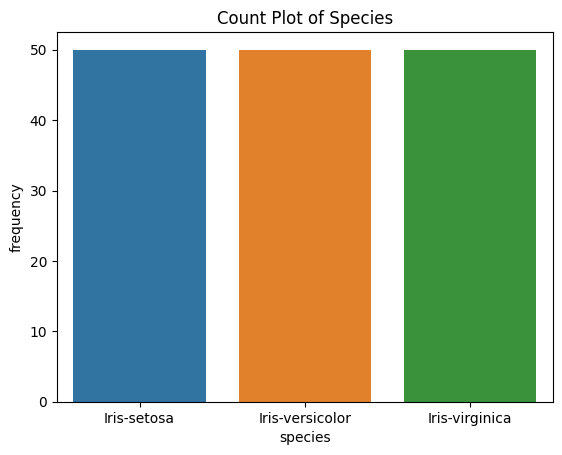

In [ ]:
sns.countplot(df, x='Species')
plt.title('Count Plot of Species')
plt.xlabel('species')
plt.ylabel('frequency')
plt.show()

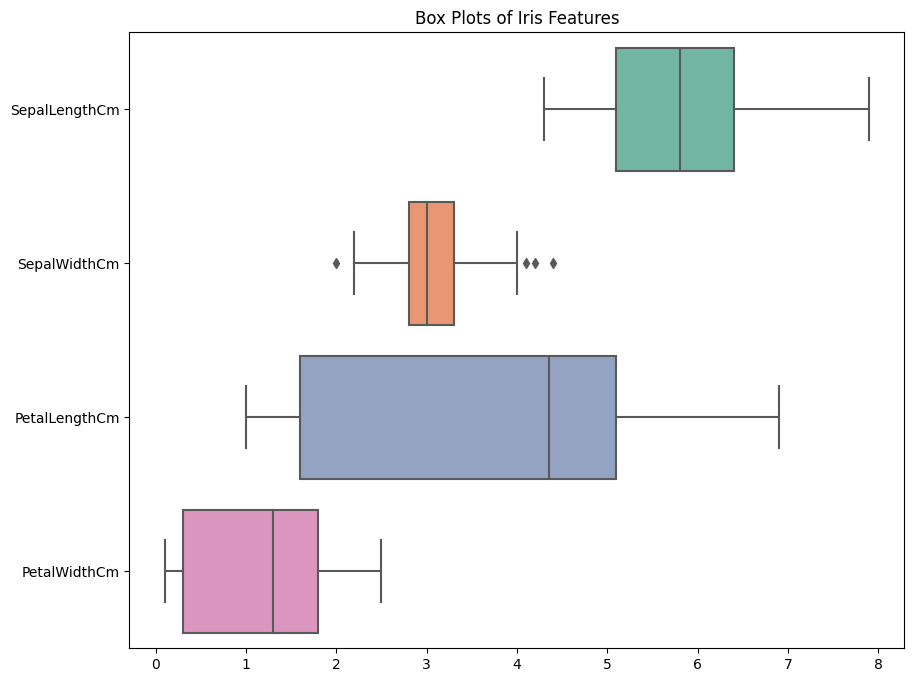

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plots of Iris Features')
plt.show()

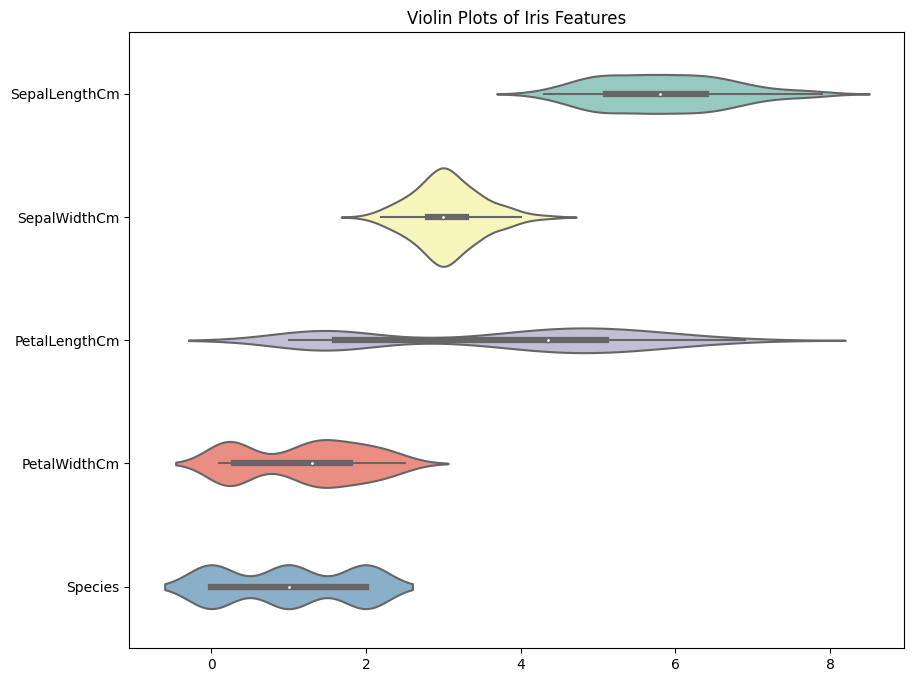

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, orient='h', palette='Set3')
plt.title('Violin Plots of Iris Features')
plt.show()

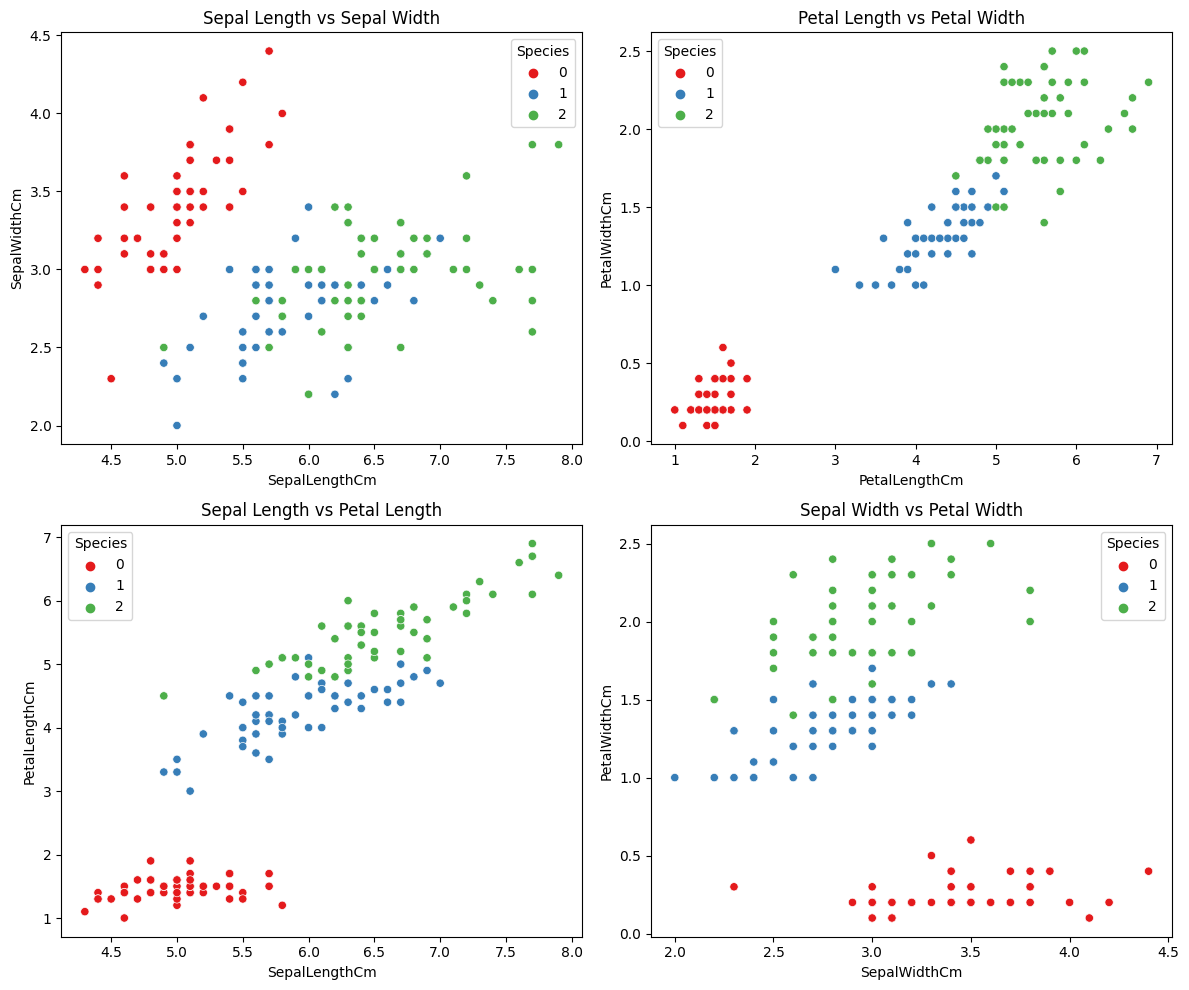

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

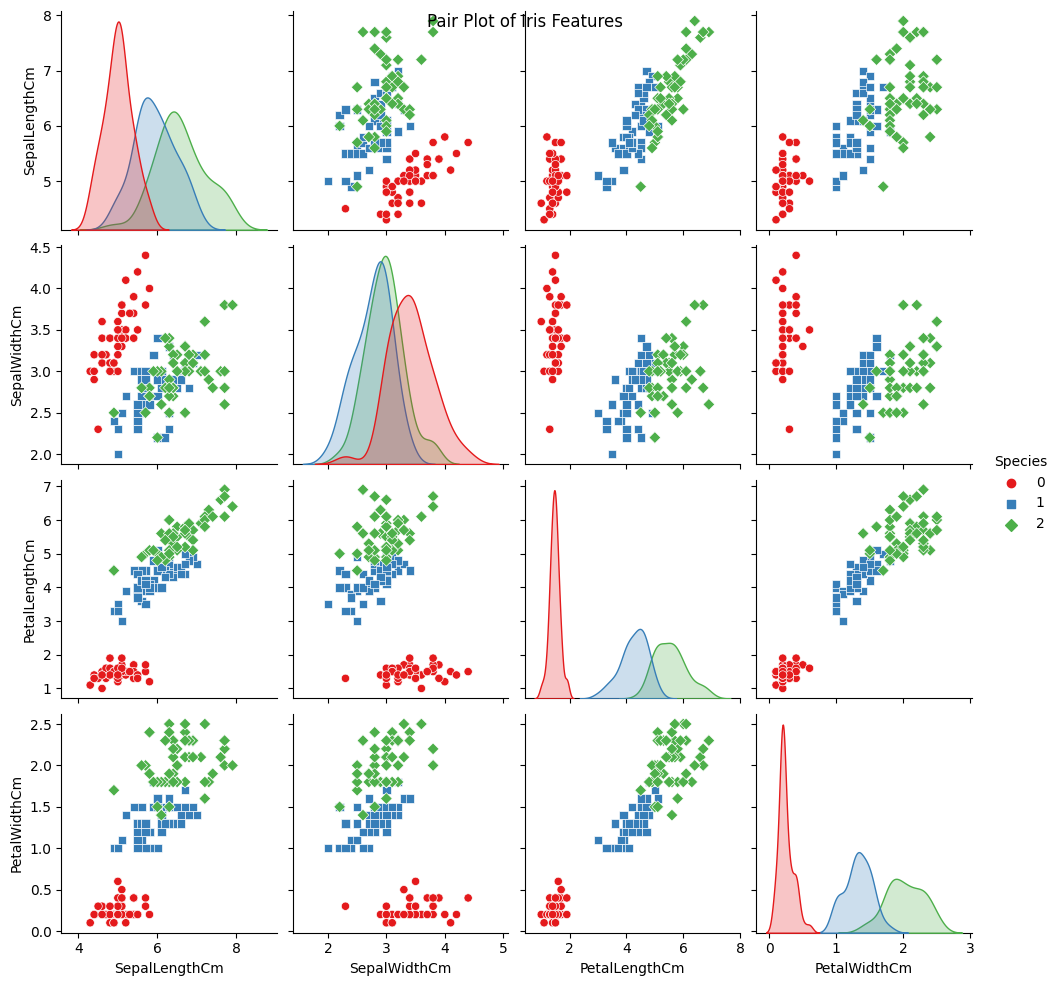

In [ ]:
sns.pairplot(df, hue='Species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features')
plt.show()

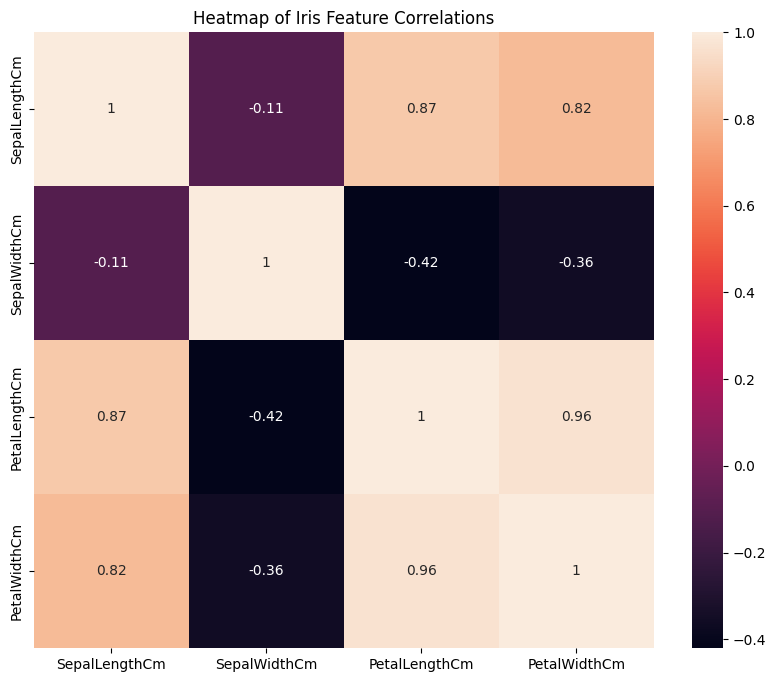

In [ ]:
numerical_features = df.drop(columns='Species')
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title('Heatmap of Iris Feature Correlations')
plt.show()

In [ ]:
X = df.drop(columns='Species')
y = df['Species']

# train test split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


In [ ]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print("Model:", name)
print("Test Accuracy:", accuracy)
print()

if accuracy > best_accuracy:
 best_accuracy = accuracy
 best_model = pipeline
import pickle
pickle.dump(best_model, open('iris_classification.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: {best_model} with accuracy score: {best_accuracy}")

Model: BernoulliNB
Test Accuracy: 0.3

-----------------------------------------------------------
Best model: Pipeline(steps=[('model', BernoulliNB())]) with accuracy score: 0.3
